<a href="https://colab.research.google.com/github/jungihong10/CNN_age_recognition/blob/main/Age_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Recently, many applications from biometrics,to entertainment use the information extracted from face images that contain information about age, gender, ethnic background, and emotional state. Automatic age estimation from facial images is one of the popular and challenging tasks that have different fields of applications such as controlling the content of the watched media depending on the customer's age.
So facial feature analysis has been a topic of interest mainly due to its applicability and Deep Learning techniques are now making it possible for face analysis to be not just a dream but a reality. This simple practice dataset can get you more acquainted with application of deep learning in age detection.



Indian Movie Face database (IMFDB) is a large unconstrained face database consisting of 34512 images of 100 Indian actors collected from more than 100 videos. All the images are manually selected and cropped from the video frames resulting in a high degree of variability interms of scale, pose, expression, illumination, age, resolution, occlusion, and makeup. IMFDB is the first face database that provides a detailed annotation of every image in terms of age, pose, gender, expression and type of occlusion that may help other face related applications.

The dataset provided a total of 19906 images.The attributes of data are as follows:

ID – Unique ID of image
Class – Age bin of person in image


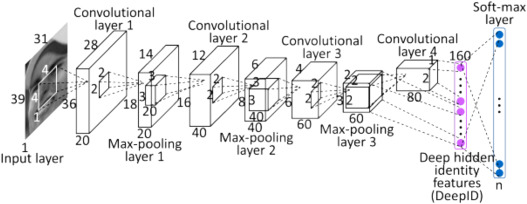

image ref : Automatic age estimation based on CNN

The main task is to predict the age of a person from his or her facial attributes. For simplicity, the problem has been converted to a multiclass problem with classes as Young, Middle and Old.

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import glob
import os
import seaborn as sns 
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# read the csv file to check out the images and class
data = pd.read_csv("/content/drive/MyDrive/my_projects/Face/train.csv")
data.head()


,ID,Class
0,377.jpg,MIDDLE
1,17814.jpg,YOUNG
2,21283.jpg,MIDDLE
3,16496.jpg,YOUNG
4,4487.jpg,MIDDLE


In [7]:
data['Class'].replace(['YOUNG','MIDDLE','OLD'],[0,1,2],inplace=True)
data.head(3)

,ID,Class
0,377.jpg,1
1,17814.jpg,0
2,21283.jpg,1


In [8]:
def readImage(path,ch = 3, resize=(150,150)):
	di = tf.io.read_file(path)
	di = tf.image.decode_jpeg(di, channels=ch)
	di = tf.image.convert_image_dtype(di, dtype=tf.float32)
	di = tf.image.resize(di, resize)
	return di

In [9]:
# function to load the data that includes images and respective labels
def load_data(image_path, label):
    img = readImage(image_path, 3, (150,150))
    return (img, label)

In [14]:
# built the list of image paths and list of respective responses of the images
PATH = "/content/drive/MyDrive/my_projects/Face/Train"
image_paths = []
for path in os.listdir(PATH):
    image_paths.append(PATH+"/"+path)
print(len(image_paths))

response_list = []

for i in image_paths:
    _,tail = os.path.split(i)
    response = data.loc[data['ID'] == tail]['Class'].values[0]
    response_list.append(response)
print(len(response_list))

4920
4920


In [15]:
# split the dataset into train and test dataset
train_size = int(0.9*(len(image_paths)))
print(train_size)
test_size = int(0.1*(len(image_paths)))

train_set = tf.data.Dataset.from_tensor_slices((image_paths[:train_size], response_list[:train_size]))
test_set = tf.data.Dataset.from_tensor_slices((image_paths[test_size:], response_list[test_size:]))

4428


In [16]:

train_set = (train_set
    .map(load_data, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(64)
    .prefetch(tf.data.AUTOTUNE)
)

In [17]:
test_set = (test_set
    .map(load_data, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(64)
    .prefetch(tf.data.AUTOTUNE)
)

In [18]:
# build the layers of CNN model
from tensorflow.keras import layers,models

cnn_model = models.Sequential([
    layers.Conv2D(filters=30, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3), padding = 'same'),
    layers.MaxPooling2D((2, 2)),
    
    # layers.BatchNormalization(),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    layers.MaxPooling2D((2, 2)),

    # layers.BatchNormalization(),
    
    # layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'same'),
    # layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    # layers.Dropout(0.25),
    layers.Dense(3, activation='softmax')
])

In [19]:
# view the summary of the cnn model
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 30)      840       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 30)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        17344     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 87616)             0         
                                                                 
 dense (Dense)               (None, 64)                5

In [20]:
# compile the model
cnn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
# fit the model
cnn_model.fit(train_set, epochs=10, validation_data=test_set)

Epoch 1/10
70/70 [==============================] - 277s 4s/step - loss: 1.0120 - accuracy: 0.5601 - val_loss: 0.8768 - val_accuracy: 0.5928
Epoch 2/10
70/70 [==============================] - 246s 4s/step - loss: 0.8245 - accuracy: 0.6276 - val_loss: 0.7976 - val_accuracy: 0.6350
Epoch 3/10
70/70 [==============================] - 267s 4s/step - loss: 0.7607 - accuracy: 0.6594 - val_loss: 0.7529 - val_accuracy: 0.6669
Epoch 4/10
70/70 [==============================] - 270s 4s/step - loss: 0.7099 - accuracy: 0.6874 - val_loss: 0.6970 - val_accuracy: 0.6953
Epoch 5/10
70/70 [==============================] - 277s 4s/step - loss: 0.6539 - accuracy: 0.7193 - val_loss: 0.6672 - val_accuracy: 0.7080
Epoch 6/10
70/70 [==============================] - 271s 4s/step - loss: 0.6100 - accuracy: 0.7376 - val_loss: 0.6101 - val_accuracy: 0.7337
Epoch 7/10
70/70 [==============================] - 270s 4s/step - loss: 0.5501 - accuracy: 0.7656 - val_loss: 0.5621 - val_accuracy: 0.7552
Epoch 8/10
70

In [23]:
cnn_model.evaluate(train_set)

70/70 [==============================] - 62s 881ms/step - loss: 0.3528 - accuracy: 0.8620


[0.35283249616622925, 0.8620144724845886]

In [24]:
# test accuracy
cnn_model.evaluate(test_set)

70/70 [==============================] - 60s 857ms/step - loss: 0.4071 - accuracy: 0.8444


[0.40713372826576233, 0.8443992733955383]

In [25]:
test_pred = cnn_model.predict(test_set)

70/70 [==============================] - 65s 926ms/step


In [26]:
y_labels = [np.argmax(item) for item in test_pred]
print("Test Predictions response sample:",y_labels[:10])

test_response = response_list[test_size:]
print("Test True response sample:", test_response[:10])


Test Predictions response sample: [1, 0, 1, 1, 1, 0, 1, 1, 0, 0]
Test True response sample: [1, 0, 1, 1, 1, 0, 1, 1, 0, 0]


In [27]:
class_names = ['YOUNG','MIDDLE','OLD']

In [28]:
# funtion to plot confusio matrix to check the accuracy of each class value
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

Confusion matrix, without normalization


<Axes: title={'center': 'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

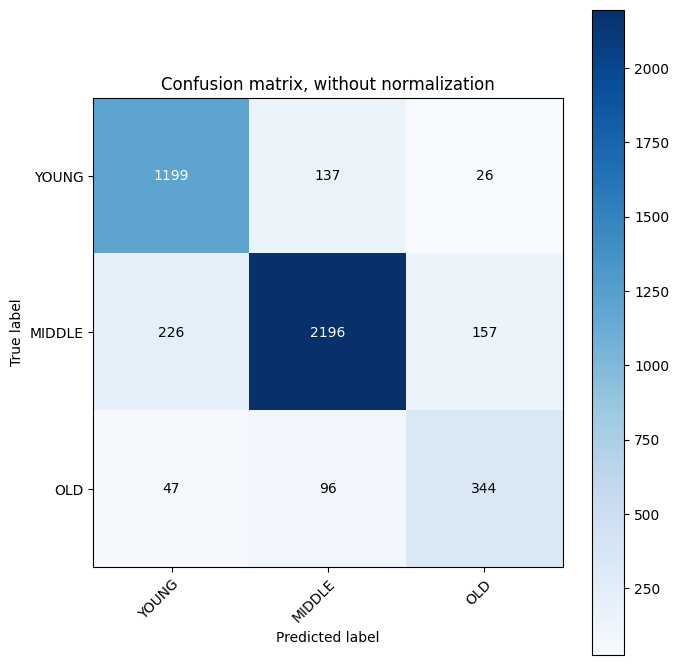

In [29]:
# plotting confusion matrix without normalization
plot_confusion_matrix(y_labels, test_response, classes=class_names,
                      title='Confusion matrix, without normalization')

Normalized confusion matrix


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

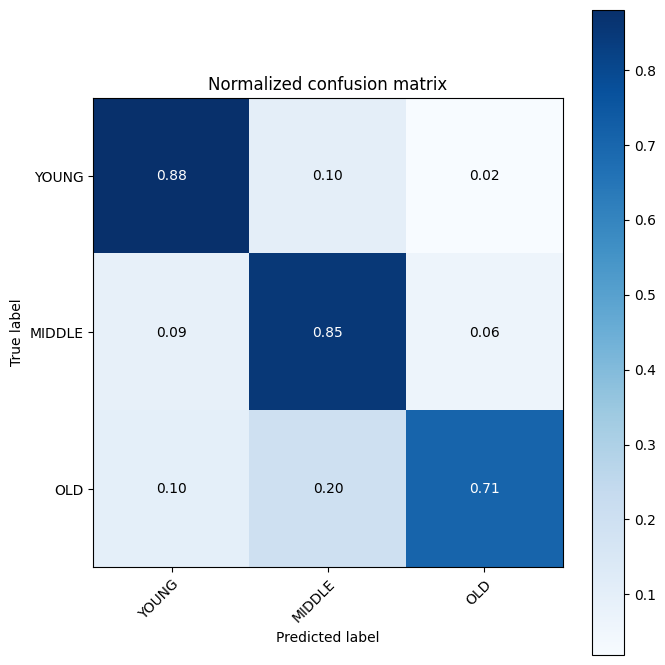

In [30]:
# plotting confusion matrix with normalization
plot_confusion_matrix(y_labels, test_response, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')